In [2]:
import pandas as pd
import numpy as np
import warnings


warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

In [3]:
# Import data to Pandas DataFrame
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
test_final = pd.read_csv('data/test_final.csv')

X_train = train.drop('target', axis=1)
y_train = train['target']

X_test = test.drop('target', axis=1)
y_test = test['target']

X_test_final = test_final.drop('target', axis=1)
y_test_final = test_final['target']

# Adaboost, Gradient Boosting, XGBoost with Original Dataset

## Adaboost

In [3]:
from sklearn.ensemble import AdaBoostClassifier

In [5]:
# Standardize with MinMax Scaler

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_train_mmscaled = min_max_scaler.fit_transform(X_train)
X_test_mmscaled = min_max_scaler.transform(X_test)


In [ ]:
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(X_train_mmscaled, y_train)

# Create predictions
adaboost_train_preds = adaboost_clf.predict(X_train_mmscaled)
adaboost_test_preds = adaboost_clf.predict(X_test_mmscaled)

In [8]:
# Calculate accuracy 
from sklearn.metrics import accuracy_score

def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))

# print("Train score:")
# print_metrics(y_train, adaboost_train_preds)
    
# print("Test score:")
# print_metrics(y_test, adaboost_test_preds)

### Tuning Adaboost Parameters using Grid Search and Cross Validation


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 

adaboost_GS = AdaBoostClassifier(algorithm='SAMME.R',
                                 random_state=11)
 
# Set grid search params
param_grid_adaboost = [ 
  {'base_estimator':[DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=5)],
   'learning_rate': [ 0.15, 0.1, 0.07],
   'n_estimators': [ 275, 300, 325]
  }
]

# Construct grid search
gs_ab = GridSearchCV(estimator=adaboost_GS,
            param_grid=param_grid_adaboost,
            scoring='accuracy',
            refit='accuracy',
            cv=5, verbose=2, return_train_score = True,
            n_jobs=-1)

# Fit using grid search
gs_ab.fit(X_train_mmscaled, y_train)

pred_gs_ab_train = gs_ab.predict(X_train_mmscaled)
pred_gs_ab_test = gs_ab.predict(X_test_mmscaled)

# Best accuracy
print('Best accuracy: %.3f' % gs_ab.best_score_)

# Best params
print('\nBest params:\n', gs_ab.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.4min finished


Best accuracy: 0.541

Best params:
 {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), 'learning_rate': 0.1, 'n_estimators': 300}


In [35]:
print("Train score:")
print_metrics(y_train, pred_gs_ab_train)
    
print("Test score:")
print_metrics(y_test, pred_gs_ab_test)

Train score:
Accuracy Score: 0.5539748355733486
Test score:
Accuracy Score: 0.540177294824135


## Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

gbt_clf = GradientBoostingClassifier()
gbt_clf.fit(X_train_mmscaled, y_train)

# Create predictions
gbt_clf_train_preds = gbt_clf.predict(X_train_mmscaled)
gbt_clf_test_preds = gbt_clf.predict(X_test_mmscaled)

print("Train score:")
print_metrics(y_train, gbt_clf_train_preds)
    
print("Test score:")
print_metrics(y_test, gbt_clf_test_preds)

Train score:
Accuracy Score: 0.622748069774092
Test score:
Accuracy Score: 0.5527595081498428


### Tuning Gradient Boosting Parameters using Grid Search and Cross Validation


In [79]:
gb_GS = GradientBoostingClassifier(random_state=11, max_features='auto')

# Set grid search params
param_grid_gboost = [ 
  {'subsample': [0.8, 1],
   'learning_rate': [0.065,0.06, 0.055],
   'n_estimators': [365, 360, 400],
   'max_depth':[1,2]
  }
]


# Construct grid search
gs_gradboost = GridSearchCV(estimator=gb_GS,
               param_grid=param_grid_gboost,
               scoring='accuracy',
               refit='accuracy',
               cv=5, verbose=2, return_train_score = True,
               n_jobs=-1)

# Fit using grid search
gs_gradboost.fit(X_train_mmscaled, y_train)

pred_gs_gb_train = gs_gradboost.predict(X_train_mmscaled)
pred_gs_gb_test = gs_gradboost.predict(X_test_mmscaled)


# Best params
best_parameters = gs_gradboost.best_params_
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))
    
# Best accuracy
print('Best accuracy: %.3f' % gs_gradboost.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.3min finished


Grid Search found the following optimal parameters: 
learning_rate: 0.065
max_depth: 2
n_estimators: 400
subsample: 0.8
Best accuracy: 0.549


In [80]:
print("Train score:")
print_metrics(y_train, pred_gs_gb_train)
    
print("Test score:")
print_metrics(y_test, pred_gs_gb_test)

Train score:
Accuracy Score: 0.6159565341721476
Test score:
Accuracy Score: 0.5544752645124392


In [81]:
gs_gradboost.cv_results_['mean_train_score']

array([0.55545837, 0.55088308, 0.55436818, 0.55056139, 0.55749585,
       0.55302773, 0.6212112 , 0.61642123, 0.6204248 , 0.61568852,
       0.62634058, 0.62155062, 0.55299195, 0.54904228, 0.55261665,
       0.54893506, 0.55536904, 0.55132993, 0.61747593, 0.61172093,
       0.61683243, 0.61111333, 0.62169372, 0.61638546, 0.54956048,
       0.54741588, 0.54950686, 0.54712992, 0.55274187, 0.54941758,
       0.61234646, 0.60741368, 0.61097026, 0.60700258, 0.61708256,
       0.61172093])

## XGBoost

In [9]:
import xgboost as xgb


xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train_mmscaled, y_train)
xgb_pred_train = xgb_clf.predict(X_train_mmscaled)
xgb_pred_test = xgb_clf.predict(X_test_mmscaled)

print("Train score:")
print_metrics(y_train, xgb_pred_train)
    
print("Test score:")
print_metrics(y_test, xgb_pred_test)

Train score:
Accuracy Score: 0.5945810694881327
Test score:
Accuracy Score: 0.5478981984558192


### Tuning XGBoost Parameters using Grid Search and Cross Validation


In [10]:
# Tuning XGBoost
from sklearn.model_selection import GridSearchCV

xgb_param_grid = {
    "learning_rate": [0.06,  0.05],
    'max_depth': [1,2],
    'subsample': [ 0.75, 0.8],
    'n_estimators': [300, 400, 350],
}

grid_xgb_clf = GridSearchCV(xgb_clf, 
                            xgb_param_grid, 
                            scoring='accuracy', 
                            cv=5, 
                            n_jobs=-1)

grid_xgb_clf.fit(X_train_mmscaled, y_train)

pred_gs_gxb_train = grid_xgb_clf.predict(X_train_mmscaled)
pred_gs_gxb_test = grid_xgb_clf.predict(X_test_mmscaled)

best_parameters = grid_xgb_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

# Best accuracy
print('Best accuracy: %.3f' % grid_xgb_clf.best_score_)


Grid Search found the following optimal parameters: 
learning_rate: 0.06
max_depth: 2
n_estimators: 400
subsample: 0.75
Best accuracy: 0.549


In [11]:
print("Train score:")
print_metrics(y_train, pred_gs_gxb_train)
    
print("Test score:")
print_metrics(y_test, pred_gs_gxb_test)

Train score:
Accuracy Score: 0.5887189019159279
Test score:
Accuracy Score: 0.5593365742064627


In [15]:
XGB_model = xgb.XGBClassifier(learning_rate=0.06,max_depth=2,n_estimators=400,subsample=.75,n_jobs=-1)
XGB_model.fit(X_train_mmscaled, y_train)
print(XGB_model.feature_importances_)

[0.08862839 0.06515945 0.05166188 0.07501226 0.0759459  0.02002131
 0.05867818 0.04893031 0.15628013 0.03884101 0.05507827 0.01422424
 0.01969032 0.01737381 0.01524172 0.01003215 0.03822763 0.01278452
 0.01351959 0.01870259 0.01464588 0.0167687  0.01554662 0.01343945
 0.01919538 0.01110812 0.01526226]


<Figure size 1440x1440 with 0 Axes>

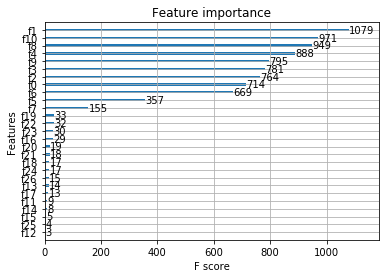

In [26]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plot_importance(XGB_model,height=0.3)

# plt.ylabel([X_train_mmscaled.columns])
plt.show();

### Confusion Matrix

In [ ]:
import itertools 

cnf_matrix = confusion_matrix(y_test, pred_gs_rf_test)
sns.set(font_scale=1.5)
plt.figure(figsize=(10,10))
plt.imshow(cnf_matrix,  cmap=plt.cm.Greens)  # Create the basic matrix.

# Add title and Axis Labels
# plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add appropriate Axis Scales
class_names = classes  # Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add Labels to Each Cell
thresh = cnf_matrix.max() / 2.  # Used for text coloring below
# Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")


# Repeat all the above with limited dataset

In [60]:
# Eliminating key, time signature, liveness, and mode_feat from features

X_train2 = train[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']]
y_train2 = train['target']

X_test2 = test[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']]
y_test2 = test['target']

X_test_final2 = test_final[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo', 'valence']]
y_test_final2 = test_final['target']

In [62]:
# Standardizing with MinMax Scaler

min_max_scaler = MinMaxScaler()

X_train_mmscaled2 = min_max_scaler.fit_transform(X_train2)
X_test_mmscaled2 = min_max_scaler.transform(X_test2)
X_test_final_mmscaled2 = min_max_scaler.transform(X_test_final2)

## Adaboost

In [63]:
#Simple Adaboost

adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(X_train_mmscaled2, y_train)

# Create predictions
adaboost_train_preds2 = adaboost_clf.predict(X_train_mmscaled2)
adaboost_test_preds2 = adaboost_clf.predict(X_test_mmscaled2)


# Calculate accuracy & f1-score
from sklearn.metrics import accuracy_score

print("Train score:")
print_metrics(y_train, adaboost_train_preds2)
    
print("Test score:")
print_metrics(y_test, adaboost_test_preds2)

Train score:
Accuracy Score: 0.501787246211038
Test score:
Accuracy Score: 0.4964255075779239


### Tuning Adaboost Parameters using Grid Search and Cross Validation


In [69]:
adaboost_GS2 = AdaBoostClassifier(algorithm='SAMME.R',
                                 random_state=11)
 
# Set grid search params
param_grid_adaboost2 = [ 
  {'base_estimator':[DecisionTreeClassifier(max_depth=2,criterion='entropy'),
                     DecisionTreeClassifier(max_depth=2,criterion='gini')],
   'learning_rate': [ 0.15, 0.1, 0.05],
   'n_estimators': [ 300, 325, 400]
  }
]

# Construct grid search
gs_ab2 = GridSearchCV(estimator=adaboost_GS2,
            param_grid=param_grid_adaboost2,
            scoring='accuracy',
            refit='accuracy',
            cv=5, verbose=2, return_train_score = True,
            n_jobs=-1)

# Fit using grid search
gs_ab2.fit(X_train_mmscaled2, y_train2)

pred_gs_ab_train2 = gs_ab2.predict(X_train_mmscaled2)
pred_gs_ab_test2 = gs_ab2.predict(X_test_mmscaled2)

# Best accuracy
print('Best accuracy: %.3f' % gs_ab2.best_score_)

# Best params
print('\nBest params:\n', gs_ab2.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.6min finished


Best accuracy: 0.539

Best params:
 {'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), 'learning_rate': 0.1, 'n_estimators': 300}


In [68]:
print("Train score:")
print_metrics(y_train2, pred_gs_ab_train2)
    
print("Test score:")
print_metrics(y_test2, pred_gs_ab_test2)

Train score:
Accuracy Score: 0.5551186731484129
Test score:
Accuracy Score: 0.540177294824135


## Gradient Boosting


In [70]:
gbt_clf2 = GradientBoostingClassifier()
gbt_clf2.fit(X_train_mmscaled2, y_train2)

# Create predictions
gbt_clf_train_preds2 = gbt_clf2.predict(X_train_mmscaled2)
gbt_clf_test_preds2 = gbt_clf2.predict(X_test_mmscaled2)

print("Train score:")
print_metrics(y_train2, gbt_clf_train_preds2)
    
print("Test score:")
print_metrics(y_test2, gbt_clf_test_preds2)

Train score:
Accuracy Score: 0.61888761795825
Test score:
Accuracy Score: 0.5519016299685444


### Tuning Gradient Boost Parameters using Grid Search and Cross Validation


In [92]:
gb_GS2 = GradientBoostingClassifier(random_state=11, max_features='auto', warm_start=False)

# Set grid search params
param_grid_gboost2 = [ 
  {'subsample': [0.9, 0.8, 0.85],
   'learning_rate': [0.06],
   'n_estimators': [600, 550],
   'max_depth':[2]
  }
]

# Construct grid search
gs_gradboost2 = GridSearchCV(estimator=gb_GS2,
               param_grid=param_grid_gboost2,
               scoring='accuracy',
               refit='accuracy',
               cv=5, verbose=2, return_train_score = True,
               n_jobs=-1)

# Fit using grid search
gs_gradboost2.fit(X_train_mmscaled2, y_train2)

pred_gs_gb_train2 = gs_gradboost2.predict(X_train_mmscaled2)
pred_gs_gb_test2 = gs_gradboost2.predict(X_test_mmscaled2)


# Best params
best_parameters2 = gs_gradboost2.best_params_
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters2.keys()):
    print("%s: %r" % (param_name, best_parameters2[param_name]))
    
# Best accuracy
print('Best accuracy: %.3f' % gs_gradboost2.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  1.1min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


Grid Search found the following optimal parameters: 
learning_rate: 0.06
max_depth: 2
n_estimators: 550
subsample: 0.85
Best accuracy: 0.551


In [93]:
print("Train score:")
print_metrics(y_train2, pred_gs_gb_train2)
    
print("Test score:")
print_metrics(y_test2, pred_gs_gb_test2)

Train score:
Accuracy Score: 0.6278238490134401
Test score:
Accuracy Score: 0.5547612239062053


## XGBoost

In [94]:
xgb_clf2 = xgb.XGBClassifier()
xgb_clf2.fit(X_train_mmscaled2, y_train2)
xgb_pred_train2 = xgb_clf2.predict(X_train_mmscaled2)
xgb_pred_test2 = xgb_clf2.predict(X_test_mmscaled2)

print("Train score:")
print_metrics(y_train2, xgb_pred_train2)
    
print("Test score:")
print_metrics(y_test2, xgb_pred_test2)

Train score:
Accuracy Score: 0.5878610237346297
Test score:
Accuracy Score: 0.5436088075493279


### Tuning XGBoost Parameters using Grid Search and Cross Validation


In [101]:
xgb_param_grid2 = {
    "learning_rate": [0.1],
    'max_depth': [2],
    'subsample': [0.8],
    'n_estimators': [500, 550],
}

grid_xgb_clf2 = GridSearchCV(xgb_clf2, 
                            xgb_param_grid2, 
                            scoring='accuracy', 
                            cv=5, 
                            n_jobs=-1)

grid_xgb_clf2.fit(X_train_mmscaled2, y_train2)

pred_gs_gxb_train2 = grid_xgb_clf2.predict(X_train_mmscaled2)
pred_gs_gxb_test2 = grid_xgb_clf2.predict(X_test_mmscaled2)

best_parameters2 = grid_xgb_clf2.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters2.keys()):
    print("%s: %r" % (param_name, best_parameters2[param_name]))

# Best accuracy
print('Best accuracy: %.3f' % grid_xgb_clf2.best_score_)

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 2
n_estimators: 500
subsample: 0.8
Best accuracy: 0.551


In [102]:
print("Train score:")
print_metrics(y_train2, pred_gs_gxb_train2)
    
print("Test score:")
print_metrics(y_test2, pred_gs_gxb_test2)

Train score:
Accuracy Score: 0.6154561052330569
Test score:
Accuracy Score: 0.5527595081498428
